In [58]:
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, Flatten, Dropout, Embedding
from keras import optimizers
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils



#### Loading the data

In [59]:
#read the data as binary data stream
with open('X_train.data', 'rb') as filehandle:
    X_train = pickle.load(filehandle)
with open('y_train.data', 'rb') as filehandle:
    y_train = pickle.load(filehandle)
with open('X_test.data', 'rb') as filehandle:
    X_test = pickle.load(filehandle)
with open('y_test.data', 'rb') as filehandle:
    y_test = pickle.load(filehandle)
y_test_categ = np_utils.to_categorical(y_test-min(y_test))


In [14]:
X_train.shape

(4800, 30)

In [51]:
y_test

array([5, 1, 5, ..., 1, 4, 5], dtype=int64)

In [37]:
sequence_size = 30 # input length
vocab_size = 8739 # Obtained while encoding
output_dim = 50 # 100, 150, 300

#### Keras Models

#### Embedding dim =50

In [66]:
model_50 = Sequential()
embedding_layer = Embedding(vocab_size,
                            output_dim,
                            input_length = sequence_size,
                            weights=None,
                            trainable = True)
model_50.add(embedding_layer)
model_50.add(Dense(2**9,input_dim=50,activation='relu',name='hidden1'))
model_50.add(Flatten())
model_50.add(Dropout(0.2))
model_50.add(Dense(2**6,activation='relu',name='hidden2'))
#model.add(Dropout(0.2))
model_50.add(Dense(5,activation='softmax',name='softmax'))
op = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_50.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model_50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 30, 100)           873900    
_________________________________________________________________
hidden1 (Dense)              (None, 30, 512)           51712     
_________________________________________________________________
flatten_7 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15360)             0         
_________________________________________________________________
hidden2 (Dense)              (None, 64)                983104    
_________________________________________________________________
softmax (Dense)              (None, 5)                 325       
Total params: 1,909,041
Trainable params: 1,909,041
Non-trainable params: 0
_________________________________________________________________


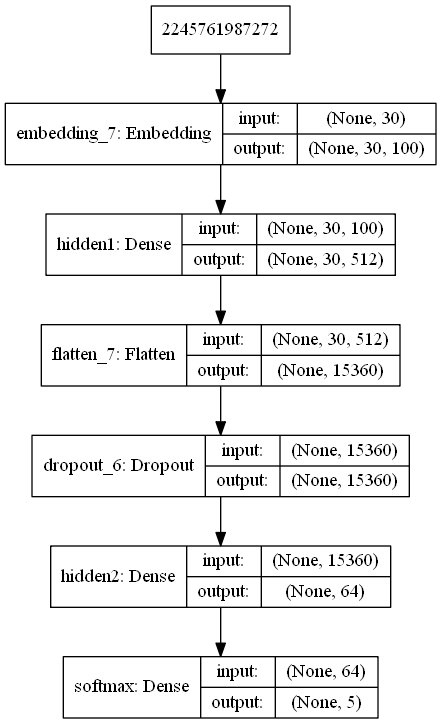

In [68]:
plot_model(model_50, show_shapes=True, show_layer_names=True, to_file='Model/model_Keras_50.png')
Image.open('Model/model_Keras_50.png')

In [69]:
history_50 = model_50.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test_categ),verbose=2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/70
 - 6s - loss: 1.1175 - acc: 0.5898 - val_loss: 0.9796 - val_acc: 0.6533
Epoch 2/70
 - 6s - loss: 0.7005 - acc: 0.7469 - val_loss: 0.9154 - val_acc: 0.7042
Epoch 3/70
 - 6s - loss: 0.3578 - acc: 0.8852 - val_loss: 0.9508 - val_acc: 0.7300
Epoch 4/70
 - 5s - loss: 0.1847 - acc: 0.9471 - val_loss: 1.0663 - val_acc: 0.7550
Epoch 5/70
 - 6s - loss: 0.1259 - acc: 0.9615 - val_loss: 1.1586 - val_acc: 0.7417
Epoch 6/70
 - 5s - loss: 0.1037 - acc: 0.9681 - val_loss: 1.2597 - val_acc: 0.7475
Epoch 7/70
 - 5s - loss: 0.0912 - acc: 0.9702 - val_loss: 1.3125 - val_acc: 0.7550
Epoch 8/70
 - 5s - loss: 0.0859 - acc: 0.9708 - val_loss: 1.4104 - val_acc: 0.7617
Epoch 9/70
 - 6s - loss: 0.0816 - acc: 0.9723 - val_loss: 1.4116 - val_acc: 0.7533
Epoch 10/70
 - 5s - loss: 0.0760 - acc: 0.9752 - val_loss: 1.5445 - val_acc: 0.7642
Epoch 11/70
 - 5s - loss: 0.0737 - acc: 0.9760 - val_loss: 1.6090 - val_acc: 0.7642
Epoch 12/70
 - 5s - loss: 0.0730 - ac

In [70]:
score_50 = model_50.evaluate(X_test,y_test_categ,verbose=1)

1200/1200 [==============================] - 0s 111us/step


In [71]:
print("Test score: {:.3f}, accuracy: {:.3f}".format(score_50[0],score_50[1]))

Test score: 2.566, accuracy: 0.747


In [72]:
predictions_50 = model_50.predict(X_test)
print(confusion_matrix(y_test, np.argmax(predictions_50, axis=1)+np.min(y_test)))

[[201  11  12   5  24]
 [ 30  38   2   8  13]
 [ 12   1  47  10  28]
 [  9   1   5  80  55]
 [ 18   8   9  43 530]]


In [73]:
print(classification_report(y_test,np.argmax(predictions_50, axis=1)+np.min(y_test)))

              precision    recall  f1-score   support

           1       0.74      0.79      0.77       253
           2       0.64      0.42      0.51        91
           3       0.63      0.48      0.54        98
           4       0.55      0.53      0.54       150
           5       0.82      0.87      0.84       608

    accuracy                           0.75      1200
   macro avg       0.68      0.62      0.64      1200
weighted avg       0.74      0.75      0.74      1200



#### Embedding dim = 100

In [74]:
output_dim = 100
model_100 = Sequential()
embedding_layer = Embedding(vocab_size,
                            output_dim,
                            input_length = sequence_size,
                            weights=None,
                            trainable = True)
model_100.add(embedding_layer)
model_100.add(Dense(2**9,input_dim=100,activation='relu',name='hidden1'))
model_100.add(Flatten())
model_100.add(Dropout(0.2))
model_100.add(Dense(2**6,activation='relu',name='hidden2'))
#model.add(Dropout(0.2))
model_100.add(Dense(5,activation='softmax',name='softmax'))
op = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_100.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model_100.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 30, 100)           873900    
_________________________________________________________________
hidden1 (Dense)              (None, 30, 512)           51712     
_________________________________________________________________
flatten_8 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15360)             0         
_________________________________________________________________
hidden2 (Dense)              (None, 64)                983104    
_________________________________________________________________
softmax (Dense)              (None, 5)                 325       
Total params: 1,909,041
Trainable params: 1,909,041
Non-trainable params: 0
_________________________________________________________________


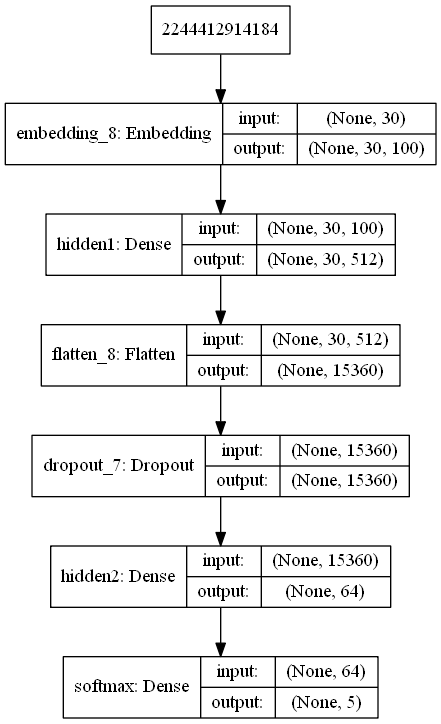

In [76]:
plot_model(model_100, show_shapes=True, show_layer_names=True, to_file='Model/model_Keras_100.png')
Image.open('Model/model_Keras_100.png')

In [77]:
history_100 = model_100.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test_categ),verbose=2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/70
 - 6s - loss: 1.1134 - acc: 0.5973 - val_loss: 0.9560 - val_acc: 0.6542
Epoch 2/70
 - 5s - loss: 0.7154 - acc: 0.7398 - val_loss: 0.8235 - val_acc: 0.7058
Epoch 3/70
 - 5s - loss: 0.3895 - acc: 0.8700 - val_loss: 0.8772 - val_acc: 0.7367
Epoch 4/70
 - 5s - loss: 0.2036 - acc: 0.9398 - val_loss: 1.0370 - val_acc: 0.7425
Epoch 5/70
 - 5s - loss: 0.1353 - acc: 0.9617 - val_loss: 1.1560 - val_acc: 0.7417
Epoch 6/70
 - 5s - loss: 0.1086 - acc: 0.9688 - val_loss: 1.2609 - val_acc: 0.7408
Epoch 7/70
 - 5s - loss: 0.0943 - acc: 0.9715 - val_loss: 1.3865 - val_acc: 0.7400
Epoch 8/70
 - 5s - loss: 0.0872 - acc: 0.9725 - val_loss: 1.4399 - val_acc: 0.7567
Epoch 9/70
 - 5s - loss: 0.0843 - acc: 0.9742 - val_loss: 1.4768 - val_acc: 0.7483
Epoch 10/70
 - 5s - loss: 0.0764 - acc: 0.9750 - val_loss: 1.5487 - val_acc: 0.7350
Epoch 11/70
 - 5s - loss: 0.0777 - acc: 0.9752 - val_loss: 1.6076 - val_acc: 0.7492
Epoch 12/70
 - 5s - loss: 0.0741 - ac

In [78]:
score_100 = model_100.evaluate(X_test,y_test_categ,verbose=1)

1200/1200 [==============================] - 0s 104us/step


In [79]:
print("Test score: {:.3f}, accuracy: {:.3f}".format(score_100[0],score_100[1]))

Test score: 2.457, accuracy: 0.746


In [80]:
predictions_100 = model_100.predict(X_test)
print(confusion_matrix(y_test, np.argmax(predictions_100, axis=1)+np.min(y_test)))

[[203   8   7   9  26]
 [ 23  39   8   4  17]
 [  8   2  41  10  37]
 [  8   1   8  72  61]
 [ 22   7   7  32 540]]


In [81]:
print(classification_report(y_test,np.argmax(predictions_100, axis=1)+np.min(y_test)))

              precision    recall  f1-score   support

           1       0.77      0.80      0.79       253
           2       0.68      0.43      0.53        91
           3       0.58      0.42      0.49        98
           4       0.57      0.48      0.52       150
           5       0.79      0.89      0.84       608

    accuracy                           0.75      1200
   macro avg       0.68      0.60      0.63      1200
weighted avg       0.73      0.75      0.73      1200



#### Embedding dim = 150 

In [82]:
output_dim = 150
model_150 = Sequential()
embedding_layer = Embedding(vocab_size,
                            output_dim,
                            input_length = sequence_size,
                            weights=None,
                            trainable = True)
model_150.add(embedding_layer)
model_150.add(Dense(2**9,input_dim=150,activation='relu',name='hidden1'))
model_150.add(Flatten())
model_150.add(Dropout(0.2))
model_150.add(Dense(2**6,activation='relu',name='hidden2'))
#model.add(Dropout(0.2))
model_150.add(Dense(5,activation='softmax',name='softmax'))
op = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_150.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
model_150.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 30, 150)           1310850   
_________________________________________________________________
hidden1 (Dense)              (None, 30, 512)           77312     
_________________________________________________________________
flatten_9 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15360)             0         
_________________________________________________________________
hidden2 (Dense)              (None, 64)                983104    
_________________________________________________________________
softmax (Dense)              (None, 5)                 325       
Total params: 2,371,591
Trainable params: 2,371,591
Non-trainable params: 0
_________________________________________________________________


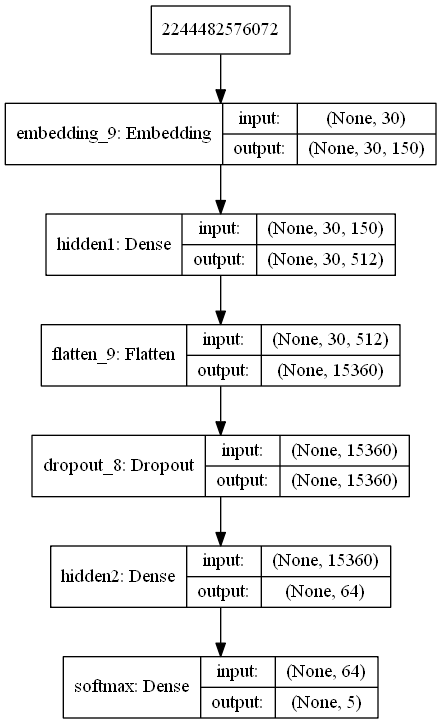

In [84]:
plot_model(model_150, show_shapes=True, show_layer_names=True, to_file='Model/model_Keras_150.png')
Image.open('Model/model_Keras_150.png')

In [85]:
history_150 = model_150.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test_categ),verbose=2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/70
 - 8s - loss: 1.1078 - acc: 0.5958 - val_loss: 0.9399 - val_acc: 0.6650
Epoch 2/70
 - 6s - loss: 0.6868 - acc: 0.7573 - val_loss: 0.8809 - val_acc: 0.7067
Epoch 3/70
 - 6s - loss: 0.3390 - acc: 0.8915 - val_loss: 1.0133 - val_acc: 0.7525
Epoch 4/70
 - 6s - loss: 0.1753 - acc: 0.9504 - val_loss: 1.0955 - val_acc: 0.7333
Epoch 5/70
 - 6s - loss: 0.1196 - acc: 0.9648 - val_loss: 1.2353 - val_acc: 0.7317
Epoch 6/70
 - 6s - loss: 0.1030 - acc: 0.9683 - val_loss: 1.2719 - val_acc: 0.7392
Epoch 7/70
 - 6s - loss: 0.0894 - acc: 0.9723 - val_loss: 1.3540 - val_acc: 0.7350
Epoch 8/70
 - 6s - loss: 0.0840 - acc: 0.9735 - val_loss: 1.4595 - val_acc: 0.7175
Epoch 9/70
 - 6s - loss: 0.0779 - acc: 0.9733 - val_loss: 1.5071 - val_acc: 0.7392
Epoch 10/70
 - 6s - loss: 0.0762 - acc: 0.9744 - val_loss: 1.5754 - val_acc: 0.7250
Epoch 11/70
 - 6s - loss: 0.0742 - acc: 0.9758 - val_loss: 1.5933 - val_acc: 0.7258
Epoch 12/70
 - 6s - loss: 0.0719 - ac

In [86]:
score_150 = model_150.evaluate(X_test,y_test_categ,verbose=1)

1200/1200 [==============================] - 0s 112us/step


In [87]:
print("Test score: {:.3f}, accuracy: {:.3f}".format(score_150[0],score_150[1]))

Test score: 2.869, accuracy: 0.728


In [88]:
predictions_150 = model_150.predict(X_test)
print(confusion_matrix(y_test, np.argmax(predictions_150, axis=1)+np.min(y_test)))

[[195   9   8  13  28]
 [ 27  38   6   8  12]
 [ 11   2  45  11  29]
 [ 12   0  10  75  53]
 [ 21   6  15  45 521]]


In [89]:
print(classification_report(y_test,np.argmax(predictions_150, axis=1)+np.min(y_test)))

              precision    recall  f1-score   support

           1       0.73      0.77      0.75       253
           2       0.69      0.42      0.52        91
           3       0.54      0.46      0.49        98
           4       0.49      0.50      0.50       150
           5       0.81      0.86      0.83       608

    accuracy                           0.73      1200
   macro avg       0.65      0.60      0.62      1200
weighted avg       0.72      0.73      0.72      1200



#### Embedding dim = 300

In [90]:
output_dim = 300
model_300 = Sequential()
embedding_layer = Embedding(vocab_size,
                            output_dim,
                            input_length = sequence_size,
                            weights=None,
                            trainable = True)
model_300.add(embedding_layer)
model_300.add(Dense(2**9,input_dim=300,activation='relu',name='hidden1'))
model_300.add(Flatten())
model_300.add(Dropout(0.2))
model_300.add(Dense(2**6,activation='relu',name='hidden2'))
#model.add(Dropout(0.2))
model_300.add(Dense(5,activation='softmax',name='softmax'))
op = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_300.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
model_300.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 30, 300)           2621700   
_________________________________________________________________
hidden1 (Dense)              (None, 30, 512)           154112    
_________________________________________________________________
flatten_10 (Flatten)         (None, 15360)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15360)             0         
_________________________________________________________________
hidden2 (Dense)              (None, 64)                983104    
_________________________________________________________________
softmax (Dense)              (None, 5)                 325       
Total params: 3,759,241
Trainable params: 3,759,241
Non-trainable params: 0
_________________________________________________________________


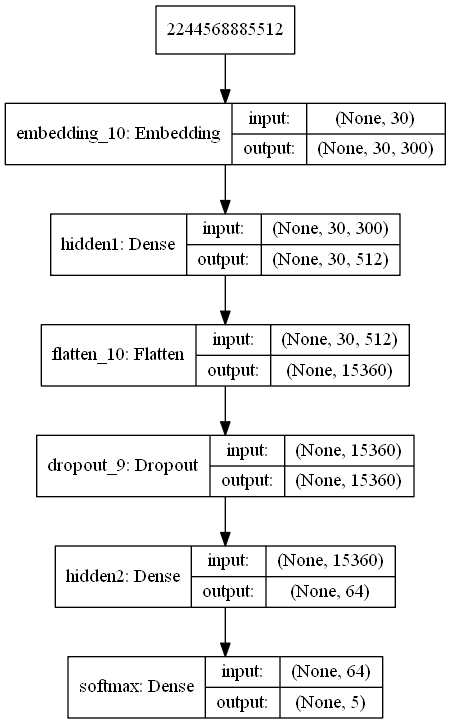

In [92]:
plot_model(model_300, show_shapes=True, show_layer_names=True, to_file='Model/model_Keras_300.png')
Image.open('Model/model_Keras_300.png')

In [93]:
history_300 = model_300.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test_categ),verbose=2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/70
 - 10s - loss: 1.0935 - acc: 0.6023 - val_loss: 0.9356 - val_acc: 0.6758
Epoch 2/70
 - 9s - loss: 0.5780 - acc: 0.8031 - val_loss: 0.8326 - val_acc: 0.7400
Epoch 3/70
 - 9s - loss: 0.2273 - acc: 0.9327 - val_loss: 0.9589 - val_acc: 0.7575
Epoch 4/70
 - 9s - loss: 0.1306 - acc: 0.9606 - val_loss: 1.0755 - val_acc: 0.7475
Epoch 5/70
 - 9s - loss: 0.1007 - acc: 0.9702 - val_loss: 1.1606 - val_acc: 0.7483
Epoch 6/70
 - 8s - loss: 0.0883 - acc: 0.9712 - val_loss: 1.2642 - val_acc: 0.7575
Epoch 7/70
 - 9s - loss: 0.0804 - acc: 0.9738 - val_loss: 1.3258 - val_acc: 0.7533
Epoch 8/70
 - 8s - loss: 0.0780 - acc: 0.9725 - val_loss: 1.4101 - val_acc: 0.7475
Epoch 9/70
 - 9s - loss: 0.0767 - acc: 0.9744 - val_loss: 1.4692 - val_acc: 0.7583
Epoch 10/70
 - 8s - loss: 0.0745 - acc: 0.9754 - val_loss: 1.5135 - val_acc: 0.7592
Epoch 11/70
 - 9s - loss: 0.0706 - acc: 0.9777 - val_loss: 1.5401 - val_acc: 0.7458
Epoch 12/70
 - 9s - loss: 0.0691 - a

In [94]:
score_300 = model_300.evaluate(X_test,y_test_categ,verbose=1)

1200/1200 [==============================] - 0s 155us/step


In [95]:
print("Test score: {:.3f}, accuracy: {:.3f}".format(score_300[0],score_300[1]))

Test score: 2.917, accuracy: 0.738


In [96]:
predictions_300 = model_300.predict(X_test)
print(confusion_matrix(y_test, np.argmax(predictions_300, axis=1)+np.min(y_test)))

[[198  16   3   3  33]
 [ 22  38   7   7  17]
 [ 12   4  45   9  28]
 [  8   6   6  74  56]
 [ 22   8  11  37 530]]


In [97]:
print(classification_report(y_test,np.argmax(predictions_150, axis=1)+np.min(y_test)))

              precision    recall  f1-score   support

           1       0.73      0.77      0.75       253
           2       0.69      0.42      0.52        91
           3       0.54      0.46      0.49        98
           4       0.49      0.50      0.50       150
           5       0.81      0.86      0.83       608

    accuracy                           0.73      1200
   macro avg       0.65      0.60      0.62      1200
weighted avg       0.72      0.73      0.72      1200

